In [88]:
# tutorial following https://www.youtube.com/watch?v=w8yWXqWQYmU
# but using both MNIST and Fashion-MNIST dataset instead of the classic MNIST dataset!
# because why not!

In [100]:
import numpy as np
np.random.seed(2024 - 1 - 21)
from numba import jit, njit
import matplotlib.pyplot as plt
import os
import gc

# ***MNIST***
-------------------

![MNIST](./MNIST/MnistExamplesModified.png)

In [90]:
# each image is a black and white 28 x 28 pixels array of 8 bit unsigned integers
# pixel values range from 0 (black) to 255 (white)

# pixels per image
PPIMAGE = 28 * 28
PPIMAGE

784

In [98]:
# we could visualize the images as a matrix with N rows for each image with PPIMAGE number of columns
# when we transpose this we get a matrix where each column is made of PPIMAGE pixels from each image and 
# each row represents nth pixel from every image

$$\begin{bmatrix}
X_{0} \dots X_{784} \\
X_{785} \dots X_{1568} \\
\dots \\
\dots \\
\dots \\
\dots \\
X_{N - 784} \dots X_{N}\\
\end{bmatrix}_T = 
\begin{bmatrix}
X_{0} & X_{785} & \dots & X_{N - 784}\\
\vdots & \vdots & \vdots & \vdots \\
X_{784} & X_{1568} & \dots & X_{N}\\
\end{bmatrix}
$$

In [101]:
os.listdir(r"./MNIST/")

['t10k-images.idx3-ubyte',
 't10k-labels.idx1-ubyte',
 'train-images.idx3-ubyte',
 'train-labels.idx1-ubyte']

# ***Fashion MNIST***
-------------------

![FASHION-MNIST](./Fashion-MNIST/fashion-mnist-sprite.png)

In [103]:
# there are 4 pieces of data
# a training images set, training labels, test set of images and test labels

os.listdir(r"./Fashion-MNIST/")

['fashion-mnist-sprite.png',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [28]:
# the datasets are binary files containing images as a string of 28 x 28 pixels

In [29]:
# the files prefixed with t10k contain the test data for 10,000 items (images and labels)
# each image is a 28 x 28 pixel greyscale image 
# and there are 10 different labels

with open("./Fashion-MNIST/train-images-idx3-ubyte", "rb") as fp:
    train_x = np.fromfile(fp, dtype = np.uint8)

In [30]:
train_x.shape

(47040016,)

In [31]:
np.unique(train_x)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [32]:
# so it turns out we just have pixel values in 8 bits
# the training dataset contains 60,000 such images

60_000 * 28 * 28

47040000

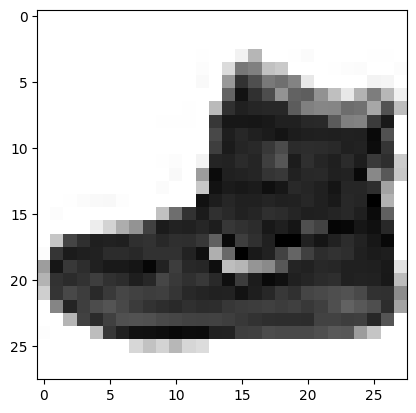

In [39]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# looks like a shoe 

plt.imshow(train_x[16:][: 28 * 28].reshape(28, 28), cmap = "binary")
plt.show()

In [61]:
train_images = np.array(np.hsplit(train_x[16:], 60_000))

In [62]:
28 * 28

784

In [81]:
# let's see how the train labels look

with open("./Fashion-MNIST/train-labels-idx1-ubyte", "r", encoding = "utf-16") as fp:
    labs = fp.read()

UnicodeError: UTF-16 stream does not start with BOM

In [82]:
# labels seem to be binary ASCII values separated by tabs (\t)

labs.split('\t')

['\x00\x00\x08\x01\x00\x00ê`',
 '\x00\x00\x03\x00\x02\x07\x02\x05\x05\x00',
 '\x05\x05\x07',
 '\x01\x00\x06\x04\x03\x01\x04\x08\x04\x03\x00\x02\x04\x04\x05\x03\x06\x06\x00\x08\x05\x02\x01\x06\x06\x07',
 '\x05',
 '\x02\x07\x03\x00\x03\x03\x03\x07\x02\x02\x06\x06\x08\x03\x03\x05\x00\x05\x05\x00\x02\x00\x00\x04\x01\x03\x01\x06\x03\x01\x04\x04\x06\x01',
 '\x01\x03\x05\x07',
 '\x07\x01\x07',
 '',
 '',
 '\x03\x02',
 '\x03\x06\x04\x01\x01\x08\x08\x00\x01\x01\x06\x08\x01',
 '\x07\x08\x08',
 '\x06\x06\x03\x01\x05\x04\x06\x07\x05\x05',
 '\x02\x02\x02\x07\x06\x04\x01\x08\x07\x07\x05\x04\x02',
 '\x01\x07\x04\x06',
 '\x07\x01\x08\x07\x01\x02\x08\x00',
 '\x01\x08\x07\x00\x05\x08\x06\x07\x02\x00\x08\x07\x01\x06\x02\x01',
 '\x06\x00\x01\x00\x05\x05\x01\x07\x00\x05\x08\x04\x00\x04\x00\x06\x06\x04\x00\x00\x04\x07\x03\x00\x05\x08\x04\x01\x01\x02',
 '\x02\x08\x05\x00\x06\x03\x04\x06\x00',
 '\x01\x07\x03\x08\x05\x08\x03\x08\x05\x02\x00\x08\x07\x00\x03\x05\x00\x06\x05\x02\x07\x05\x02\x06\x08\x02\x06\x08\x00